In [1]:
import cv2
import numpy as np
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
model_path="Final_model.h5"

In [3]:
final_model=tf.keras.models.load_model(model_path)

In [4]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Random test

In [5]:
img_test_path="/Users/macbookpro/Desktop/Projects/FaceEmotionRecognitionCNN/Random test images/surprised.jpg"
frame=cv2.imread(img_test_path)

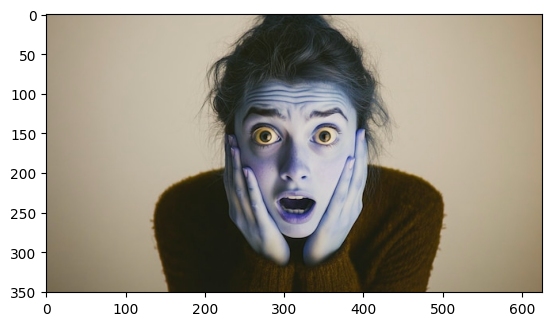

In [6]:
plt.imshow(frame)

In [7]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

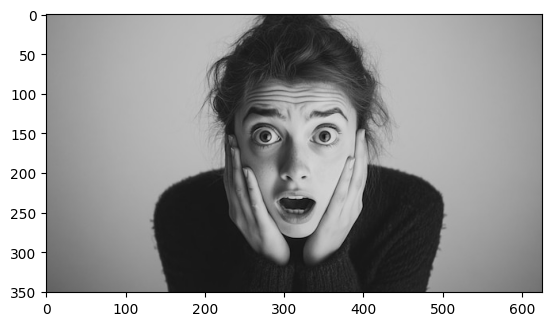

In [8]:
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

In [9]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [10]:
if faceCascade.empty():
    print("Error loading Haar Cascade file")
else :
    print("Haar Cascade file loaded successfully")

Haar Cascade file loaded successfully


In [11]:
faces = faceCascade.detectMultiScale(gray, 1.1 , 4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2. rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey, ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

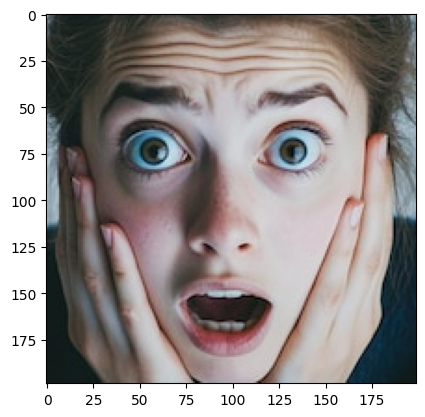

In [12]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [13]:
final_image=cv2.resize(face_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [14]:
predictions=final_model.predict(final_image)
np.argmax(predictions)
if np.argmax(predictions)==6 : 
    print("emotion detected : surpised")

1/1 [==============================] - 2s 2s/step
emotion detected : surpised


# Optimized Live Webcam Demo : 
#### - FPS Reduction
#### - Increasing wait time
#### - Auto Frames Skipping

In [5]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
font_scale = 1.5
font = cv2. FONT_HERSHEY_PLAIN
# set the rectangle background to white
rectangle_bgr = (255, 255, 255)
# make a black image
img = np.zeros ((500, 500))
# set some text
text = "Some text in a box!"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25
# make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2. rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2. FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 255, 0), thickness=1)
#open camera
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

cv2.resizeWindow("Webcam Feed", 320, 240)

while True:
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    gray = cv2.cvtColor (frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)    

    # Detect faces
    
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess = face_cascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex,ey, ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew] ## cropping the face

    final_image =cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image,axis =0) ## need fourth dimension
    final_image=final_image/255.0
    
    font = cv2. FONT_HERSHEY_PLAIN

    Predictions = final_model.predict(final_image)
    print(f"Face Detected ! Current emotion is : {np.argmax(Predictions)}")
    print("       *******************************************       ")

    font_scale = 1.5
    
    # classification and model result 
    
    if (np.argmax(Predictions)==0):
        status = "Angry"
        x1, y1, w1, h1 = 0,0,175,75
        # Draw black background rectangle
        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # Add a text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0,255),2, cv2. LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

    elif (np.argmax(Predictions)==1):
        status = "Disgust"
        x1, y1, w1, h1 = 0,0,175,75
        # Draw black background rectangle
        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # Add a text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2, cv2. LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

    elif (np.argmax(Predictions)==2):
        status = "Fear"
        x1, y1, w1, h1 = 0,0,175,75
        # Draw black background rectangle
        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # Add a text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2, cv2. LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

    elif (np.argmax(Predictions)==3):
        status = "Happy"
        x1, y1, w1, h1 = 0,0,175,75
        # Draw black background rectangle
        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # Add a text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 255, 0),2, cv2. LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

    elif (np.argmax(Predictions)==4):
        status = "Neutral"
        x1, y1, w1, h1 = 0,0,175,75
        # Draw black background rectangle
        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # Add a text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (255, 255, 255),2, cv2. LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

    elif (np.argmax(Predictions)==5):
        status = "Sad"
        x1, y1, w1, h1 = 0,0,175,75
        # Draw black background rectangle
        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # Add a text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2, cv2. LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

    elif (np.argmax(Predictions)==6):
        status = "Surprised"
        x1, y1, w1, h1 = 0,0,175,75
        # Draw black background rectangle
        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # Add a text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2. FONT_HERSHEY_SIMPLEX, 0.7,(0, 255, 255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 255, 255),2, cv2. LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))


    cv2.imshow('Face Emotion Recognition', cv2.resize(frame, (770, 500)))  

    # Press 'q' to quit the video feed
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

# Release the webcam and destroy all OpenCV windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 2s 2s/step
Face Detected ! Current emotion is : 6
       *******************************************       
1/1 [==============================] - 0s 91ms/step
Face Detected ! Current emotion is : 4
       *******************************************       
1/1 [==============================] - 0s 109ms/step
Face Detected ! Current emotion is : 4
       *******************************************       
1/1 [==============================] - 0s 90ms/step
Face Detected ! Current emotion is : 4
       *******************************************       
1/1 [==============================] - 0s 94ms/step
Face Detected ! Current emotion is : 4
       *******************************************       
1/1 [==============================] - 0s 117ms/step
Face Detected ! Current emotion is : 4
       *******************************************       
1/1 [==============================] - 0s 106ms/step
Face Detected ! Current emotion is : 6
       *******

Face not detected
Face not detected
1/1 [==============================] - 0s 74ms/step
Face Detected ! Current emotion is : 4
       *******************************************       
Face not detected
1/1 [==============================] - 0s 79ms/step
Face Detected ! Current emotion is : 4
       *******************************************       
Face not detected
1/1 [==============================] - 0s 75ms/step
Face Detected ! Current emotion is : 4
       *******************************************       
1/1 [==============================] - 0s 75ms/step
Face Detected ! Current emotion is : 2
       *******************************************       
1/1 [==============================] - 0s 72ms/step
Face Detected ! Current emotion is : 6
       *******************************************       
1/1 [==============================] - 0s 79ms/step
Face Detected ! Current emotion is : 2
       *******************************************       
Face not detected
1/1 [===========

In [6]:
cap.release()
cv2.destroyAllWindows()